In [1]:
using ITensors 
using Plots 
using LaTeXStrings 
using JLD

In [2]:
#use of site type The answer is that we would like to be able to  
#select different functions to call on an ITensor Index based on what tags it has,
#but that is not directly possible in Julia or indeed most languages. thats the reason of my error! 

In [3]:
#ITensors.op(::OpName"Exponent", ::SiteType"Boson", d::Int) = exp(1im * pi * N(d))
#ITensors.op(::OpName"ExponentHC", ::SiteType"Boson", d::Int) = exp(-1im * pi * N(d)) 

#NewOp(theta, siteindex) = exp(1im * theta * op("N", siteindex)) 
#NewOpHC(theta, siteindex) = exp(-1im * theta * op("N", siteindex))
##BH-Model and phase diagram 
function energyfor(N, L, J)
#L = 5 #Number of Sites
#N = 5 #Number of bosons
sites = siteinds("Boson", L; dim = 5 ,  conserve_number = false, conserve_qns= true )  

# C++ configuration
#sites = Boson(L, {"MaxOcc=", N, "ConserveQNs", true, "ConserveNb", false})
sweeps = Sweeps(2)
setmaxdim!(sweeps, 200, 400, 800)
setcutoff!(sweeps, 1E-16)

U = 1.0
#J = 1.0
#theta = pi  
#Exponent = op(NewOp, sites)  
#ExponentHC = op(NewOpHC, sites)
#Exponent = op("Exponent",  sites)  
#ExponentHC = op("ExponentHC", sites)
 
    
ampo = OpSum() 

for i in 1:(L-1)
    ampo += - U / 2, "N", i;
    ampo += U / 2, "N", i, "N", i;     
    ampo += -J,"A", i, "Adag", i + 1; 
    #mexponenti = -1im*theta*op("N",sites,i)
    #MExpni = exp(mexponenti)
    ampo += -J, "Adag", i, "A", i + 1 ;#, "ExponentHC" , i + 1;
end  
#Periodic terms 
ampo += -J  , 1 , "A", 1, "Adag", L;
ampo += -J, "Adag", 1, "A", L;#, "ExponentHC"   , L; 
#term for interaction on the L site
ampo += -U/2, "N", L;
ampo += U/2, "N", L,"N", L; 
##########################
#ampo += V, "N", 1, "N", L;
H = MPO(ampo, sites) 
    if N==L
        state = ["1" for i in 1:L]  
    elseif N>L 
        state = ["1" for i in 1:L] 
        state[1] = "2"     
    else
        state = ["1" for i in 1:L]  
        state[1] = "0"  
    end  

psi = randomMPS(sites, state)

energy, psi0 = dmrg(H, psi, sweeps, outputlevel = 0) #Outputlevel used to do not see the output of each sweep of dmrg
    return energy 
end

energyfor (generic function with 1 method)

In [7]:
energyfor(5,5,1)

-8.279883493026656

In [34]:
function make_n_matrix(d)
    n = zeros(d, d)
    for i in 1:d
        n[i, i] = i #- 1
    end
    return n 
end   
theta = 0
ITensors.op(::OpName"Exponent", ::SiteType"Boson", d::Int) = exp(1im * theta * make_n_matrix(d)) 
    
ITensors.op(::OpName"ExponentHC", ::SiteType"Boson", d::Int) = exp(-1im * theta * make_n_matrix(d)) 

In [35]:
function energyfors(N, L, J) 
    
#let


##BH-Model and phase diagram 

#L = 5 #Number of Sites
#N = 5 #Number of bosons
sites = siteinds("Boson", L; dim = 4 ,  conserve_number = false, conserve_qns= true )   

#ITensors.op(::OpName"Exponent", ::SiteType"Boson", L::Int) = exp(1im * pi * N(L))
#ITensors.op(::OpName"ExponentHC", ::SiteType"Boson", L::Int) = exp(-1im * pi * N(L)) 
# C++ configuration
#sites = Boson(L, {"MaxOcc=", N, "ConserveQNs", true, "ConserveNb", false})
sweeps = Sweeps(2)
setmaxdim!(sweeps, 10, 15, 50, 100, 200, 200, 300, 600, 900, 900, 1000, 1000, 1000)
setcutoff!(sweeps, 1E-17)

U = 1.0
#J = 1.0
 
#V = 1.0

#Exponent = op("Exponent",  sites)  
#ExponentHC = op("ExponentHC", sites)


    
Exponent = op("Exponent", sites, L)  
ExponentHC = op("ExponentHC", sites, L)      

ampo = OpSum()  


#Exponent(theta, siteindex) = exp(1im * theta * make_n_matrix(d)) 
#ExponentHC(theta, siteindex) = exp(-1im * theta * make_n_matrix(d))

    
for i in 1:(L-1)
    ampo += - U / 2, "N", i;
    ampo += U / 2, "N", i, "N", i;     
    ampo += -J,"ExponentHC", i ,"A", i, "Adag", i + 1; 
    ampo += -J, "Adag", i, "A", i + 1 , "Exponent" , i ;
end  
#Periodic terms 
ampo += -J  , 1 ,"ExponentHC", 1 ,"A", 1, "Adag", L;
ampo += -J, "Adag", 1, "A", L, "Exponent"   , 1; 
#term for interaction on the L site
ampo += -U/2, "N", L;
ampo += U/2, "N", L,"N", L; 
##########################
#ampo += V, "N", 1, "N", L;
H = MPO(ampo, sites) 
    if N==L
        state = ["1" for i in 1:L]  
    elseif N>L 
        state = ["1" for i in 1:L] 
        state[1] = "2"     
    else
        state = ["1" for i in 1:L]  
        state[1] = "0"  
    end  

psi = randomMPS(sites, state)

energy, psi0 = dmrg(H, psi, sweeps, outputlevel = 0) #Outputlevel used to do not see the output of each sweep of dmrg
    return energy  

end

energyfors (generic function with 1 method)

In [36]:
#Good results!

In [29]:
energyfor(5,5,1)

-8.279883493026656

In [30]:
energyfors(3,3,1)

-3.493597703902667

In [37]:
##Chemical potential
N = 7
M = 7
valuesofen = Vector{Float64}()
for t in 0:0.05:0.50  
    push!(valuesofen, energyfors(N, M, t))
end  
valuesofenlow = Vector{Float64}()
for t in 0:0.05:0.50  
    push!(valuesofenlow, energyfors((N-1), M, t))
end 
valuesofenup = Vector{Float64}() 
for t in 0:0.05:0.50  
    push!(valuesofenup, energyfors((N+1), M, t))
end 


In [12]:
#graph
#t = 0:0.05:0.50
#plot(t,valuesofen-valuesofenlow , xlabel =L"J/U", ylabel=L"\mu/U", title =L"First~Mott~lobe", label =L"7~sites~down", xlims=(0, 0.50), ylims=(0,1))
#plot!(t,valuesofenup-valuesofen , xlabel =L"J/U", ylabel=L"\mu/U", title =L"First~Mott~lobe", label =L"7~sites~up", xlims=(0, 0.50), ylims=(0,1))
#savefig("FirstmottlobeDMRG.png")

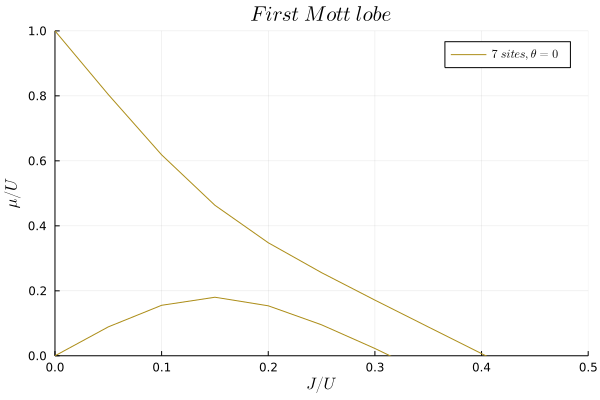

In [38]:
t = 0:0.05:0.50 
up = valuesofen-valuesofenlow
down = valuesofenup-valuesofen
plot(t,up, xlabel =L"J/U", ylabel=L"\mu/U", title =L"First~Mott~lobe", xlims=(0, 0.50), ylims=(0,1), label=false, color =5)# label =L"9~sites~down,\theta = \pi")
plot!(t,down , xlabel =L"J/U", ylabel=L"\mu/U", title =L"First~Mott~lobe", label =L"7~sites, \theta = 0", xlims=(0, 0.50), ylims=(0,1), palette=:default , color = 5)


In [39]:
@save "data-for-seven-DMRG-theta-zero.jld" up down

In [88]:
##savefig("AnyonsDMRG-9sites-2.png")

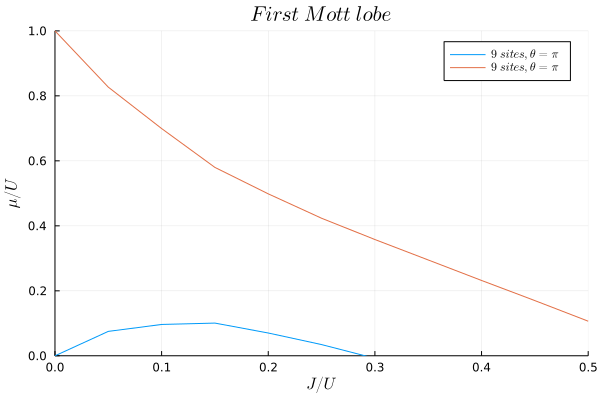

In [89]:
#t = 0:0.05:0.50
#plot(t,[valuesofen-valuesofenlow valuesofenup-valuesofen] , xlabel =L"J/U", ylabel=L"\mu/U", title =L"First~Mott~lobe", labels =L"9~sites,\theta = \pi", xlims=(0, 0.50), ylims=(0,1))

In [90]:
#savefig("theta-pi-DMRG-anyons.png")